In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from time import time
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_distances

from data_loader import load_ratings, load_user_item_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user_item = load_user_item_matrix()
print('User item matrix shape: ', user_item.shape)

User item matrix shape:  (138493, 26744)


In [3]:
user_item

<138493x26744 sparse matrix of type '<class 'numpy.float64'>'
	with 20000263 stored elements in Compressed Sparse Row format>

In [4]:
def calculate_deviation(U):
    N,M = U.shape
    U = U.tocsc()
    dev = np.zeros((M,M))
    sgnU = U.sign()
    S = sgnU.T*sgnU           # S[i,j] = ile razy film i-ty był obejrzany razem z j-tym
    for i in range(M):
        ui = U[:,i].toarray()
        for j in range(i):
            uj = U[:,j].toarray()
            mask = ui*uj > 0
            dev[i,j] = (mask.T.dot(ui - uj)) / S[i,j]
            dev[j,i] = -dev[i,j]
    dev[np.isnan(dev)] = 0
    return dev,S

In [69]:
U = user_item[:1000,:1000]

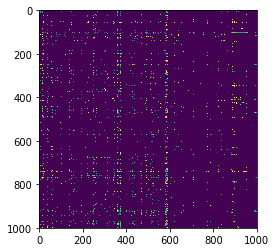

In [70]:
plt.imshow(U.toarray())

In [71]:
d,c = calculate_deviation(U)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [86]:
d1 = d.copy()
s1 = c.copy()

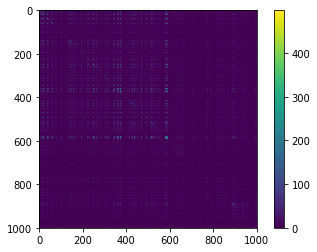

In [72]:
c2 = c.toarray()
plt.imshow(c2)
plt.colorbar()

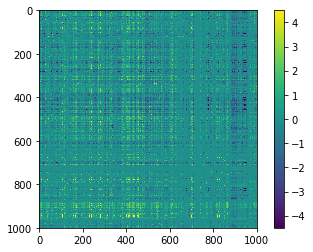

In [73]:
plt.imshow(d)
plt.colorbar()

In [74]:
U2 = U.toarray()
U2 = U2[:,np.any(U2 != 0, axis = 0)]
U2 = U2[np.any(U2 != 0, axis = 1),:]

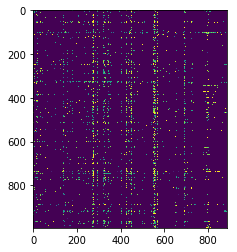

In [75]:
plt.imshow(U2)

In [78]:
d,s = calculate_deviation(csr_matrix(U2))

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


498.0


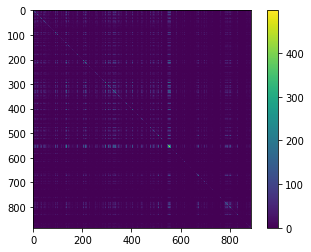

In [79]:
plt.imshow(s.toarray())
print(s.max())
plt.colorbar()

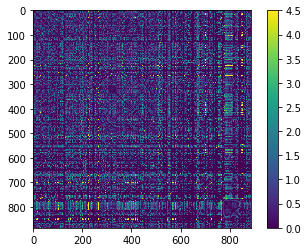

In [85]:
plt.imshow(np.abs(d))
plt.colorbar()

In [43]:
def predict(U, dev, S, i):
    Su = U[i,:].sign()
    R = Su.multiply((S.sign()))
    P = (R.multiply(U[i,:].toarray() + dev)).sum(axis=1) / R.sum(axis=1)
    return P,R,Su

In [87]:
def predict_weighted(U, dev, S, i):
    Su = U[i,:].sign()             # który film u widział
    C = S[i,:]                     # wagi
    R = Su.multiply((S.sign()))
    P = (R.multiply(C.multiply(U[i,:].toarray() + dev))).sum(axis=1) / (R.multiply(C)).sum(axis=1)
    return P,R,Su

In [91]:
P,R,Su = predict(csr_matrix(U2), d, s, 100)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [92]:
Pw,R,Su = predict_weighted(csr_matrix(U2), d, s, 100)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
